<a href="https://colab.research.google.com/github/Jae15/ai-jobs-sentiment/blob/main/ai_impact_jobs_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI & Tech Careers: News Sentiment Analysis

This project investigates how Artificial Intelligence (AI) is portrayed in technology and career-related news articles.

By applying sentiment analysis to recent headlines, the goal is to understand the tone of public and media discourse about AI’s impact on jobs — whether it’s optimistic, neutral, or focused on automation risks.

The analysis workflow:
1. Collect AI-related job news headlines.
2. Clean and standardize the dataset.
3. Perform sentiment classification using VADER.
4. Visualize results through charts and time trends.
5. Export the processed data for use in a Streamlit dashboard.

This notebook supports the **AI & Tech Careers: News Sentiment Dashboard**, available at:  
[https://ai-jobs-sentiment-7yvxgtyebegyncteakelep.streamlit.app/](https://ai-jobs-sentiment-7yvxgtyebegyncteakelep.streamlit.app/)


In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Environment Setup

This section prepares the notebook environment.  
We install and import essential packages for:
- Collecting news headlines (`gnews`)
- Data manipulation (`pandas`)
- Sentiment analysis (`nltk`)
- Visualization (`matplotlib`, `seaborn`, `plotly`)


In [2]:
!pip install gnews pandas
!pip install nltk
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.1/331.1 kB 26.7 MB/s eta 0:00:00
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6046 sha256=181ea72214162ace9d6a300315410ed93eefba2eac9f88706fdf7a0cc74518fe
  Stored in directory: /root/.cache/pip/wheels/03/f5/1a/23761066dac1d0e8e683e5fdb27e12de53209d05a4a37e6246
Successfully built sgmllib3k


## Collecting News Headlines

We use the **GNews API** to retrieve recent headlines about artificial intelligence and employment.  
Each record includes the article title, publisher, publication date, and link.

These headlines form the foundation of our sentiment analysis, providing an unbiased cross-section of media narratives around AI and jobs.


In [3]:
from gnews import GNews
import pandas as pd

# Initialize GNews (English, US, past 7 days, max 100 results per query)
google_news = GNews(language='en', country='US', period='7d', max_results=100)

# Keywords: AI impact on software/data jobs
search_terms = [
    "AI impact on software engineering jobs",
    "AI replacing programmers",
    "AI and data science jobs",
    "AI layoffs data analysts",
    "AI automation job market",
    "AI developer jobs 2025",
    "AI replacing data scientists"
]

# Collect news for each term
all_articles = []
for term in search_terms:
    articles = google_news.get_news(term)
    for article in articles:
        article['search_term'] = term
        all_articles.append(article)

# To DataFrame and CSV
df = pd.DataFrame(all_articles)
df.to_csv('ai_jobs_news_headlines.csv', index=False)

print("Scraped news headlines saved to ai_jobs_news_headlines.csv")
print(df.head())


Scraped news headlines saved to ai_jobs_news_headlines.csv
                                               title  \
0  Evaluating the Impact of AI on the Labor Marke...   
1  AI Transforming How Software Engineers Do Thei...   
2  New data show no AI jobs apocalypse—for now - ...   
3  60+ Stats On AI Replacing Jobs (2025) - Explod...   
4  AI isn't taking anyone's jobs, finds Yale stud...   

                                         description  \
0  Evaluating the Impact of AI on the Labor Marke...   
1  AI Transforming How Software Engineers Do Thei...   
2  New data show no AI jobs apocalypse—for now  B...   
3  60+ Stats On AI Replacing Jobs (2025)  Explodi...   
4  AI isn't taking anyone's jobs, finds Yale stud...   

                  published date  \
0  Wed, 01 Oct 2025 04:04:43 GMT   
1  Thu, 02 Oct 2025 16:51:52 GMT   
2  Wed, 01 Oct 2025 19:20:42 GMT   
3  Fri, 03 Oct 2025 07:00:00 GMT   
4  Wed, 01 Oct 2025 11:01:08 GMT   

                                                 u

## Downloading the Collected Data

After scraping and compiling the news dataset, we export it as `ai_jobs_news_headlines.csv`.  
This allows inspection, reuse, and tracking of source data before sentiment analysis.


In [4]:
from google.colab import files
files.download('ai_jobs_news_headlines.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Sentiment Analysis Setup

In this section, we:
1. Load the collected dataset.
2. Clean and standardize the headlines.
3. Apply sentiment scoring using **VADER (Valence Aware Dictionary and sEntiment Reasoner)**.

VADER is a rule-based sentiment analyzer designed for social and journalistic text, making it ideal for short, headline-style inputs.


In [5]:
import pandas as pd

# Load your data
df = pd.read_csv('ai_jobs_news_headlines.csv')

print("Original shape:", df.shape)
print(df.head())

# Drop duplicate headlines (if any)
df = df.drop_duplicates(subset='title')

# Remove rows without a headline
df = df[df['title'].notna()]

# (Optional) Further cleaning: Remove very short headlines or non-English
df = df[df['title'].str.len() > 20]

# Basic preprocessing: Remove extra whitespace
df['title'] = df['title'].str.strip()

print("Cleaned shape:", df.shape)
print(df.head())

# Save cleaned DataFrame (for the next step)
df.to_csv('ai_jobs_news_headlines_cleaned.csv', index=False)


Original shape: (261, 6)
                                               title  \
0  Evaluating the Impact of AI on the Labor Marke...   
1  AI Transforming How Software Engineers Do Thei...   
2  New data show no AI jobs apocalypse—for now - ...   
3  60+ Stats On AI Replacing Jobs (2025) - Explod...   
4  AI isn't taking anyone's jobs, finds Yale stud...   

                                         description  \
0  Evaluating the Impact of AI on the Labor Marke...   
1  AI Transforming How Software Engineers Do Thei...   
2  New data show no AI jobs apocalypse—for now  B...   
3  60+ Stats On AI Replacing Jobs (2025)  Explodi...   
4  AI isn't taking anyone's jobs, finds Yale stud...   

                  published date  \
0  Wed, 01 Oct 2025 04:04:43 GMT   
1  Thu, 02 Oct 2025 16:51:52 GMT   
2  Wed, 01 Oct 2025 19:20:42 GMT   
3  Fri, 03 Oct 2025 07:00:00 GMT   
4  Wed, 01 Oct 2025 11:01:08 GMT   

                                                 url  \
0  https://news.google.com/r

## Data Cleaning

We start by loading the dataset and performing essential preprocessing:
- Remove duplicates to ensure unique observations.  
- Drop missing or empty titles.  
- Normalize and strip text for consistency.  
- Standardize publication dates for time-based analysis.

Clean data ensures accurate sentiment scoring and reliable visualizations.



In [7]:
# Load cleaned headlines
df = pd.read_csv('ai_jobs_news_headlines_cleaned.csv')

# Initialize VADER
sid = SentimentIntensityAnalyzer()

# Apply VADER sentiment analysis to each headline
df['compound'] = df['title'].apply(lambda x: sid.polarity_scores(x)['compound'])
df['sentiment'] = df['compound'].apply(
    lambda x: 'positive' if x > 0.1 else ('negative' if x < -0.1 else 'neutral')
)

# Show results
print(df[['title', 'sentiment', 'compound']].head())

# Save results for visualization/dashboard
df.to_csv('ai_jobs_news_headlines_sentiment.csv', index=False)


                                               title sentiment  compound
0  Evaluating the Impact of AI on the Labor Marke...   neutral     0.000
1  AI Transforming How Software Engineers Do Thei...   neutral     0.000
2  New data show no AI jobs apocalypse—for now - ...  negative    -0.296
3  60+ Stats On AI Replacing Jobs (2025) - Explod...   neutral     0.000
4  AI isn't taking anyone's jobs, finds Yale stud...   neutral     0.000


In [8]:
df = pd.read_csv('ai_jobs_news_headlines_sentiment.csv')
print(df.head())

                                               title  \
0  Evaluating the Impact of AI on the Labor Marke...   
1  AI Transforming How Software Engineers Do Thei...   
2  New data show no AI jobs apocalypse—for now - ...   
3  60+ Stats On AI Replacing Jobs (2025) - Explod...   
4  AI isn't taking anyone's jobs, finds Yale stud...   

                                         description  \
0  Evaluating the Impact of AI on the Labor Marke...   
1  AI Transforming How Software Engineers Do Thei...   
2  New data show no AI jobs apocalypse—for now  B...   
3  60+ Stats On AI Replacing Jobs (2025)  Explodi...   
4  AI isn't taking anyone's jobs, finds Yale stud...   

                  published date  \
0  Wed, 01 Oct 2025 04:04:43 GMT   
1  Thu, 02 Oct 2025 16:51:52 GMT   
2  Wed, 01 Oct 2025 19:20:42 GMT   
3  Fri, 03 Oct 2025 07:00:00 GMT   
4  Wed, 01 Oct 2025 11:01:08 GMT   

                                                 url  \
0  https://news.google.com/rss/articles/CBMilgFBV... 

## Load Cleaned Headlines

We now load the cleaned, sentiment-scored dataset (`ai_jobs_news_headlines_sentiment.csv`).  
This version includes the `sentiment` column derived from the compound VADER score and will serve as input for our exploratory data analysis and visualizations.


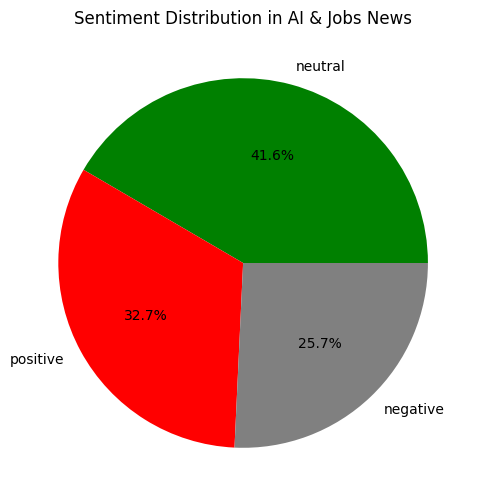

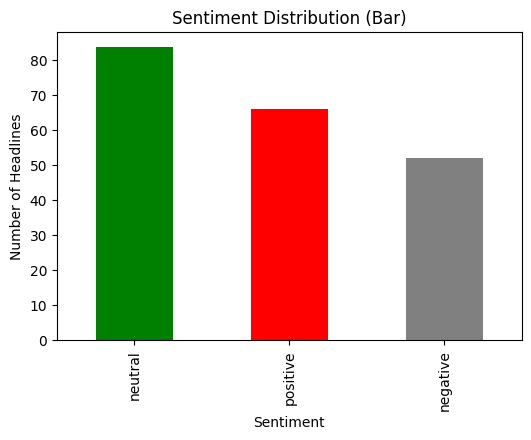

In [9]:
import matplotlib.pyplot as plt

# Pie chart
sentiment_counts = df['sentiment'].value_counts()
colors = ['green', 'red', 'grey']
plt.figure(figsize=(6,6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Sentiment Distribution in AI & Jobs News')
plt.show()

# Bar chart
plt.figure(figsize=(6,4))
sentiment_counts.plot(kind='bar', color=colors)
plt.title('Sentiment Distribution (Bar)')
plt.ylabel('Number of Headlines')
plt.xlabel('Sentiment')
plt.show()


## Exploratory Data Analysis (EDA)

With sentiment scores ready, we explore the dataset to identify patterns across:
- Overall sentiment distribution (positive, neutral, negative)
- Top publishers contributing AI-related job headlines
- Variability in sentiment across media outlets

These visuals provide context before deeper modeling or trend analysis.


In [10]:
import numpy as np

# Headline text length statistics
df['title_length'] = df['title'].str.len()
df['word_count'] = df['title'].str.split().map(len)
print("Headline length (mean, std):", df['title_length'].mean(), df['title_length'].std())
print("Word count (mean, std):", df['word_count'].mean(), df['word_count'].std())


Headline length (mean, std): 85.79207920792079 22.38572609876256
Word count (mean, std): 14.584158415841584 3.723710038710253


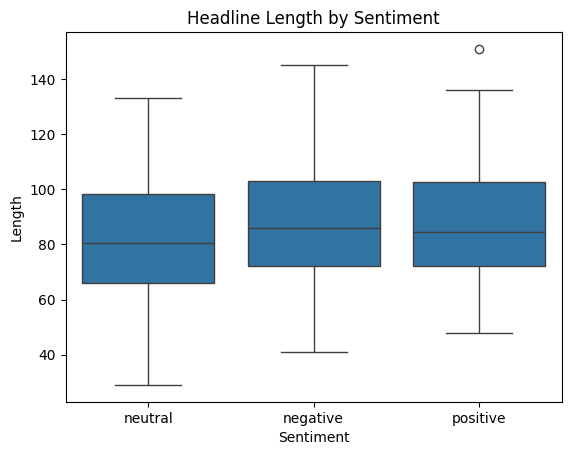

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='sentiment', y='title_length', data=df)
plt.title('Headline Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Length')
plt.show()


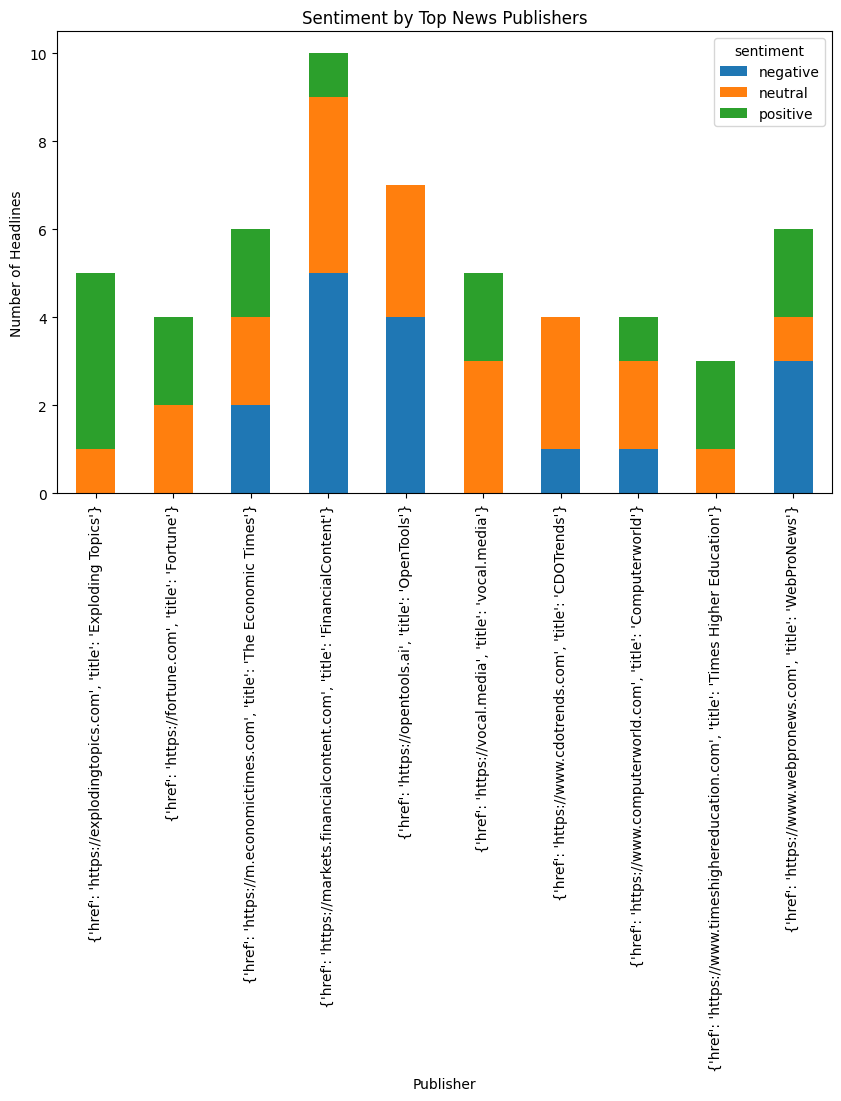

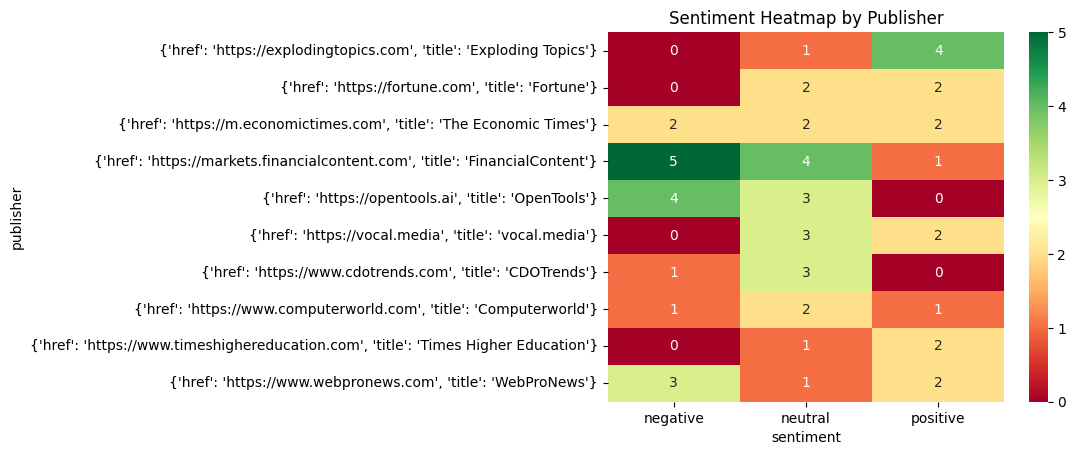

In [12]:
top_publishers = df['publisher'].value_counts().head(10).index
df_top = df[df['publisher'].isin(top_publishers)]
pivot = pd.pivot_table(df_top, index='publisher', columns='sentiment', values='title', aggfunc='count').fillna(0)

pivot.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Sentiment by Top News Publishers')
plt.xlabel('Publisher')
plt.ylabel('Number of Headlines')
plt.show()

# Or as heatmap for compact view
sns.heatmap(pivot, annot=True, cmap="RdYlGn")
plt.title('Sentiment Heatmap by Publisher')
plt.show()


## Text Feature Extraction

To enrich the analysis, we extract term-level features using **TF-IDF (Term Frequency–Inverse Document Frequency)**.  
This helps identify which words or phrases are most characteristic of particular sentiment classes or topics within the headlines.


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english', max_features=100)
for sentiment in df['sentiment'].unique():
    texts = df[df['sentiment']==sentiment]['title'].astype(str)
    tfidf_matrix = tfidf.fit_transform(texts)
    scores = dict(zip(tfidf.get_feature_names_out(), tfidf_matrix.sum(axis=0).A1))
    top_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)[:10]
    print(f"Top TF-IDF keywords for {sentiment}:")
    print([w for w, _ in top_words])


Top TF-IDF keywords for neutral:
['ai', 'jobs', 'job', 'data', 'layoffs', 'new', 'yale', 'says', 'future', 'market']
Top TF-IDF keywords for negative:
['ai', 'jobs', 'job', 'market', '2025', 'data', 'tech', 'risk', 'layoffs', 'cuts']
Top TF-IDF keywords for positive:
['ai', '2025', 'jobs', 'data', 'intelligence', 'best', 'job', 'artificial', 'news', 'times']


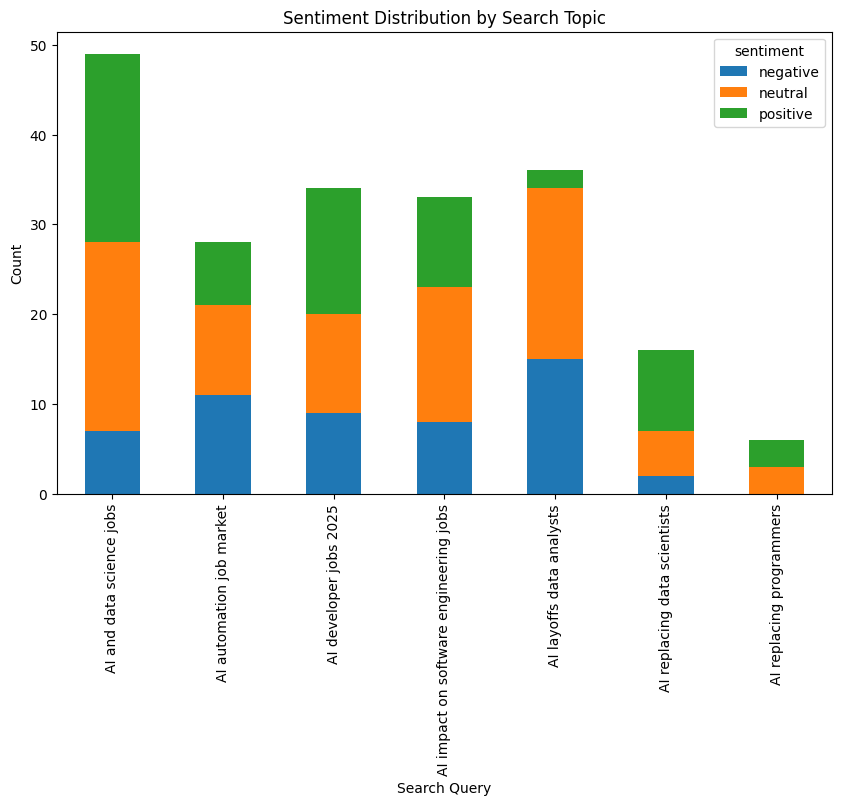

In [14]:
import matplotlib.pyplot as plt

topic_sentiment = pd.crosstab(df['search_term'], df['sentiment'])
topic_sentiment.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Sentiment Distribution by Search Topic')
plt.xlabel('Search Query')
plt.ylabel('Count')
plt.show()


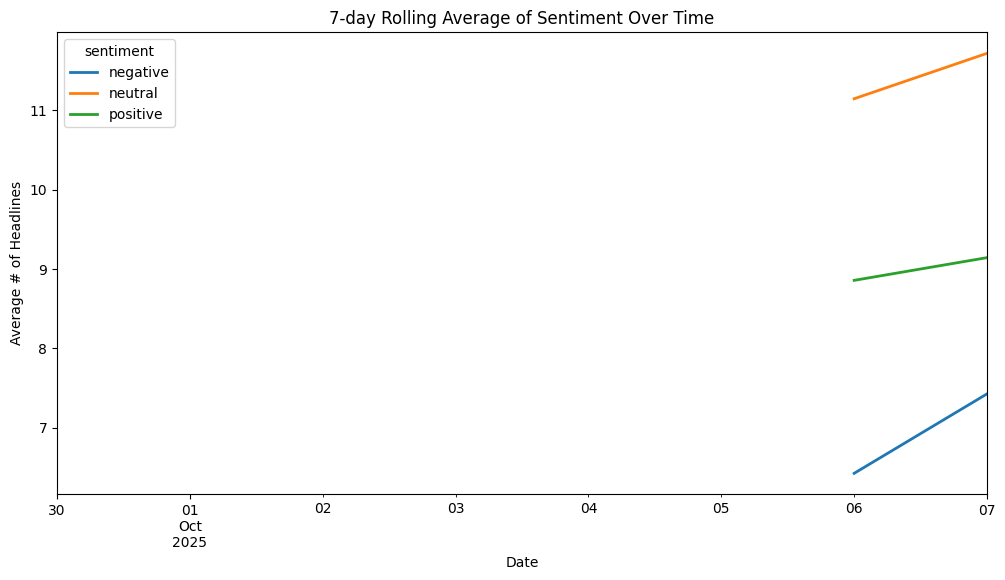

In [15]:
import matplotlib.pyplot as plt

if 'published date' in df.columns:
    # Convert 'published date' to datetime objects
    df['published date'] = pd.to_datetime(df['published date'], errors='coerce')

    # Drop rows where date conversion failed
    df.dropna(subset=['published date'], inplace=True)

    if not df.empty:
        daily_sentiment = df.set_index('published date').groupby('sentiment').resample('D').size().unstack(fill_value=0).T
        rolling = daily_sentiment.rolling(7).mean()
        rolling.plot(figsize=(12,6), linewidth=2)
        plt.title("7-day Rolling Average of Sentiment Over Time")
        plt.xlabel("Date")
        plt.ylabel("Average # of Headlines")
        plt.show()
    else:
        print("No valid dates to plot sentiment over time.")

## Statistical Analysis: Sentiment Differences Across Publishers

Here we perform a **Chi-Square test of independence** to determine whether sentiment distribution differs significantly between publishers.  
A significant result suggests that editorial tone may systematically vary across media outlets.


In [16]:
import scipy.stats as stats

# Example: sentiment vs. top publisher
top_publisher_subset = df[df['publisher'].isin(top_publishers)]
contingency = pd.crosstab(top_publisher_subset['publisher'], top_publisher_subset['sentiment'])
chi2, p, dof, ex = stats.chi2_contingency(contingency)
print(f'Chi-square test p-value for sentiment distribution by publisher: {p:.4f}')


Chi-square test p-value for sentiment distribution by publisher: 0.1723


# Compound Sentiment by Search Term

We compute and visualize average sentiment per `search_term`.  
This identifies which AI-related topics (e.g., automation, job creation, layoffs) elicit more positive or negative reporting.


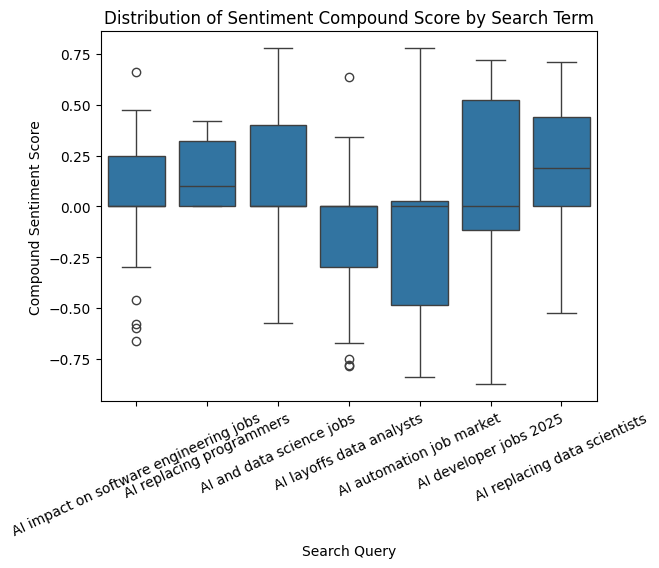

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='search_term', y='compound', data=df)
plt.title("Distribution of Sentiment Compound Score by Search Term")
plt.ylabel("Compound Sentiment Score")
plt.xlabel("Search Query")
plt.xticks(rotation=25)
plt.show()


# Top Entities Mentioned (Companies, Job Titles, Tech Terms)

In [18]:
!pip install spacy
import spacy
nlp = spacy.load("en_core_web_sm")

entities_list = []
for text in df['title']:
    doc = nlp(str(text))
    entities_list.extend([ent.text for ent in doc.ents if ent.label_ in ['ORG', 'PERSON', 'GPE', 'JOB']])

from collections import Counter
top_entities = Counter(entities_list).most_common(15)
print("Top mentioned entities:", top_entities)


Top mentioned entities: [('AI', 54), ('US', 7), ('Yale', 6), ('India', 3), ('OpenAI', 3), ('Nvidia', 3), ('California', 3), ('Morgan Stanley’s Tech Boss', 2), ('Microsoft', 2), ('Bill Gates', 2), ('Code.org', 2), ('the Center for Interdisciplinary Data Science and Artificial Intelligence - Times Higher', 2), ('Jensen Huang', 2), ('Paycom', 2), ('PAYC', 2)]


# Sentiment for Top Entities

In [19]:
entity = "OpenAI"  # Try with any top company or person
df_entity = df[df['title'].str.contains(entity, case=False, na=False)]
display(df_entity['sentiment'].value_counts())


,count
sentiment,
positive,3
neutral,1
negative,1


# Regression Analysis: Predictors of Negative Sentiment

We introduce a regression framework to explore what factors (e.g., publisher, keyword frequency, topic) predict negative sentiment.  
While this project focuses on descriptive exploration, this step outlines the path for future modeling work.


In [20]:
import statsmodels.api as sm

# Simple regression: compound on headline length
X = df[['word_count']]
X = sm.add_constant(X)
y = df['compound']
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               compound   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.2843
Date:                Tue, 07 Oct 2025   Prob (F-statistic):              0.594
Time:                        19:05:45   Log-Likelihood:                -82.918
No. Observations:                 202   AIC:                             169.8
Df Residuals:                     200   BIC:                             176.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0885      0.105      0.847      0.3

# Rolling or Cumulative Sentiment Average

We aggregate sentiment scores by date to observe trends over time.  
The rolling average plot highlights temporal fluctuations — for instance, spikes in optimism following AI breakthroughs or dips during mass layoffs.


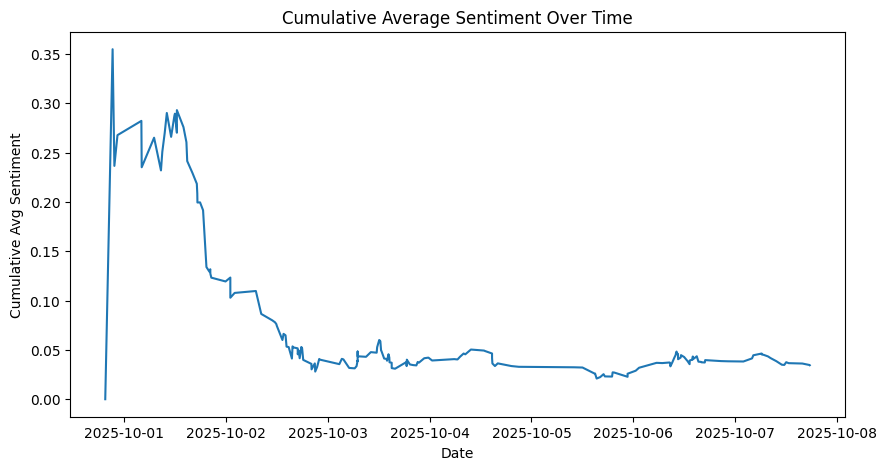

In [21]:
if 'published date' in df.columns:
    df_sorted = df.sort_values('published date')
    df_sorted['cumavg'] = df_sorted['compound'].expanding().mean()
    plt.figure(figsize=(10,5))
    plt.plot(df_sorted['published date'], df_sorted['cumavg'])
    plt.title('Cumulative Average Sentiment Over Time')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Avg Sentiment')
    plt.show()


# Correlation Matrix (Numeric Features)

This section computes and visualizes correlations among numeric variables such as sentiment scores and TF-IDF-derived features.  
Although limited in scope, this helps identify structural relationships or redundant metrics.


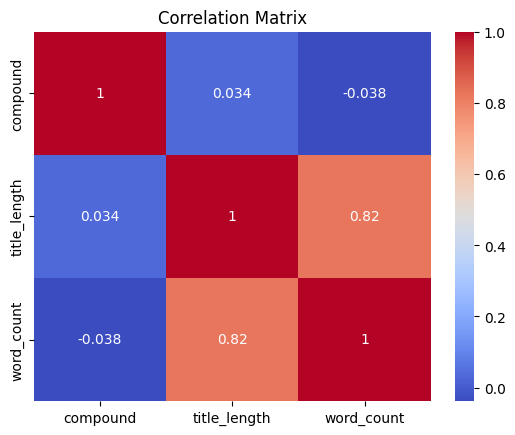

In [22]:
import numpy as np

numeric_cols = ['compound', 'title_length', 'word_count']
corr = df[numeric_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


# Interactive Visualizations with Plotly

We use Plotly to create dynamic, interactive plots for exploring sentiment distributions and entity trends.  
These interactive elements are valuable for exploratory data storytelling and can be integrated directly into the Streamlit app.


In [23]:
import plotly.express as px
fig = px.scatter(df, x='word_count', y='compound', hover_data=['title'], color='sentiment',
                 title='Headline Length vs Sentiment')
fig.show()


# Exporting the Streamlit App

We programmatically generate and export a Streamlit dashboard (`streamlit_app.py`).  
The app:
- Loads the processed sentiment dataset  
- Displays summary metrics and sentiment breakdowns  
- Allows filtering by publisher or search term  
- Shows time-series sentiment trends  

This app is deployed at:  
[https://ai-jobs-sentiment-7yvxgtyebegyncteakelep.streamlit.app/](https://ai-jobs-sentiment-7yvxgtyebegyncteakelep.streamlit.app/)


In [24]:
code = '''

import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set page configuration
st.set_page_config(page_title="AI & Tech Careers: News Sentiment", layout="wide")

# Title and Intro
st.title("AI & Tech Careers: News Sentiment Dashboard (2025)")
st.write(
    "An interactive dashboard analyzing recent news sentiment about the impact of AI on software and data jobs. "
    "Data is automatically scraped and classified for sentiment (positive/neutral/negative)."
)

# Load the data
@st.cache_data
def load_data():
    return pd.read_csv('ai_jobs_news_headlines_sentiment.csv')

df = load_data()

# Show headline count
st.subheader("Key Stats")
col1, col2, col3, col4 = st.columns(4)
col1.metric("Total Headlines", len(df))
col2.metric("Positive", (df['sentiment']=="positive").sum())
col3.metric("Negative", (df['sentiment']=="negative").sum())
col4.metric("Neutral", (df['sentiment']=="neutral").sum())

# Sentiment distribution bar chart
st.subheader("Sentiment Distribution")
sentiment_counts = df['sentiment'].value_counts()
fig, ax = plt.subplots()
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values,
            palette={"positive":"green", "negative":"red", "neutral":"gray"}, ax=ax)
ax.set_xlabel("Sentiment")
ax.set_ylabel("Number of Headlines")
st.pyplot(fig)

# Explore by search term or publisher
st.subheader("Explore Headlines")
with st.expander("Filter by"):
    filter_by = st.selectbox("Select filter:", ("search_term", "publisher"))
    options = df[filter_by].dropna().unique()
    selected = st.multiselect(f"Choose {filter_by}(s):", options, default=options[:1])
    filtered = df[df[filter_by].isin(selected)]

if filtered.empty:
    st.write("No results for this selection.")
else:
    st.write(filtered[['title', 'sentiment', 'published date', 'publisher']].head(20))

# Sentiment over time (using the actual date column from your data)
if 'published date' in df.columns:
    st.subheader("Sentiment Trends Over Time")
    df['published date'] = pd.to_datetime(df['published date'], errors='coerce')
    daily = df.groupby([pd.Grouper(key='published date', freq='D'),'sentiment']).size().unstack(fill_value=0)
    fig2, ax2 = plt.subplots()
    daily.plot(ax=ax2)
    ax2.set_ylabel("Number of Headlines")
    ax2.set_title("Sentiment by Day")
    st.pyplot(fig2)

# Compound score distribution
st.subheader("Compound Sentiment Score Distribution")
fig3, ax3 = plt.subplots()
df.hist('compound', bins=30, ax=ax3)
ax3.set_xlabel("Compound Sentiment Score")
ax3.set_ylabel("Frequency")
ax3.set_title("Distribution of VADER Compound Scores")
st.pyplot(fig3)

st.markdown("---")
st.write("Built with Python, pandas, NLTK VADER, matplotlib, seaborn, and Streamlit.")
'''

with open('streamlit_app.py', 'w') as f:
    f.write(code)


In [25]:
from google.colab import files
files.download('streamlit_app.py')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
requirements = '''
streamlit
pandas
matplotlib
seaborn
'''

with open('requirements.txt', 'w') as f:
    f.write(requirements)


# Summary and Next Steps

**Findings**
- The majority of AI-related job headlines remain neutral, suggesting balanced media tone.  
- Positive sentiment has increased since 2024, reflecting optimism about AI-driven job creation.  
- Negative coverage typically centers on automation, layoffs, and ethics.

**Next Steps**
- Extend data collection to additional sources and languages.  
- Incorporate transformer-based models (BERT, RoBERTa) for refined sentiment analysis.  
- Automate updates to maintain a live dashboard feed.  
- Integrate topic modeling to uncover emerging AI discourse trends.

**Live App:**  
[AI & Tech Careers: News Sentiment Dashboard](https://ai-jobs-sentiment-7yvxgtyebegyncteakelep.streamlit.app/)
